# Quiz 4 Review
---

# Decision Trees

### Understand the core concepts behind decision tree classifiers
- Decision Trees are **non-parametric** models which means they only consider 1 feature at a time and not how multiple features interact simultaneously.
- The fundamental concept is be continuing to make splits or decision we can create decision paths that can be used to isolate similar variables or classes from others.
- Decision Trees are a "greedy" model and thus they consider the optimal option at each split as it would be very computationally expensive for them to think ahead at the _consequences_ of their decision.  
- Not Influence by scale of features because each feature is considered individually.
- Does not require dummies.
- Does not care about distribution of feature.
- Easy to interpret.

### How class balance relates to Gini and Entropy
- Gini and Entropy are the calculations used to decide how to cut or split data.  Ideally, we want to make splits that result in isolating large chunks of similar observations/classes thus we use these equations to evaluate potential splits and how well they are separating 1 class from the others.

### The concept of Information Gain
- Decision trees do not rely on just Entropy or Gini for decisions.  Instead they utilize an information gain equation which considers the Gini/Entropy from each side of a split, the percent of values that end up on either side of the split and the previous understanding of the distribution of classes at that point in the tree.


### How decision trees use information gain to make decisions
- Gini and Entropy consider the proportions of the classes and are thus calculated after a split/hypothetical split.  They are then incorporated into Information gain.  As Gini or Entropy equations are only useful when looking at the result of a single split.  Information Gain is another equation that takes the Gini or Entropy values for all sides of a split and weights them according to how many values end up on each side as well as previous understanding of how classes were distributed.
    - That being said a split that divided 100 samples into two nodes.  One node got 90 of the values and the other got 10, because the first node has a majority of the values the weight applied to its Gini or Entropy value will be greater than its counterpart node and thus contribute more to the information gain.




**Decision Tree Regressor**
- Works similar to a DTC but makes splits to optimize (minimize) a loss metric such as RMSE.
    - Before it makes a split, it looks at the current RMSE and tries to identify the split that doesn't create the lowest Gini or Entropy values for information gain, but instead tries to find the split that minimizes RMSE.
- Regressive values are calculated by averaging the target value from all the observations that ended up on that leaf. 
---

In [1]:
# Load Data
import seaborn as sns
iris = sns.load_dataset('iris') 
### iris's species column is an object column and not a integer
### As in, species names are list in text and the values are not converted to 0s,1s or 2s
# Instantiate Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 3,min_samples_split=5)

In [2]:
# Issolate Data
X = iris.drop('species', axis = 1)
y = iris['species']
# fit model
dtc.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

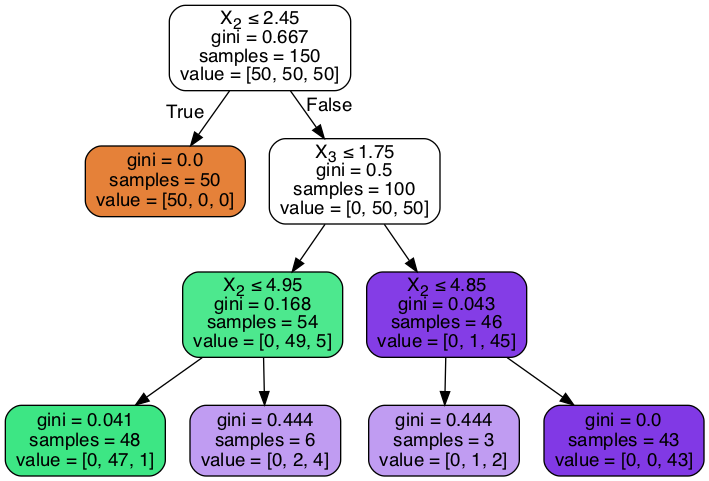

In [5]:
# Export the tree viz for analysis and understanding.
import pydotplus
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
dot_data = StringIO() 
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Remember that note about the 'species' column?

# Bagging, Boosting & Ensemble Methods.


### Execute bootstrapping.
- Bootstraping is the concept of random sampling with replacement.
```python
def bootstrap(data, stat = np.mean, size = 1000):
    stat_list = []
    for i in range(size):
        statistic = stat(np.random.choice(data, size = len(data), replace = True))
        stat_list.append(statistic)
    return stat_list
```



### Describe the differences among and implement bagged models random forests, and ExtraTrees.

**Bagged Models**  
- Bagging = Bootstrap Aggregating.  Or the process of building several parallel models on random bootstrapped samples, then averaging the predictive power of each model.


**Random Forests**
- Random forests are a type of _tree based_ ensemble model
- They use random subsets of the feature columns in order to build each tree.  The goal is to create trees that don't rely on "overly important features" and thus need to be able to generalize the data from other, maybe less important columns.
- On top of only starting with a random subset of features for each tree, each split _can_ only consider and additional random subset of that.  (By default in sklearn it is the square root of the number of features)
- Random forests are very powerful and tend to do well at reducing variance because it reduces the affect that overly important features have on the final prediction.  Similar to the way the Regularization reduces variance by shrinking coefficients. 

**ExtraTrees : _Extremely Random Trees_**
- Extra Trees works similar to Random forests, except they add an additional layer of randomness.
- For each decision node, the ExtraTrees model only considers one possible split per feature/column.
- Typically ExtraTree models are grown wider and deeper to account for the randomness.



### Understand the differences between bagging and boosting.
**Bagging**
- Parallel model building
- Aggregates the results of all models simultaneously.
- Bootstrap sampling makes each model unique in that it is (hopefully) exposed to data that is slightly different.

**Boosting**
- Sequential model building
- One model is built after learning from the previous.
- Models are made unique by the information they learn/ the mistakes of the previous model(s)


### Understand how boosting is an ensemble method.
- Ensemble is a combination of several machine learning models.
- Boosting combines the errors of previous models into the sequential models and thus the absolute output is a transformed version of all the model outputs.

### Learn the pros and cons to using boosting models.
- Boosting is mostly built on the continued knowledge of weak learners, thus you do not need a model that can generalize well to start, just one that can offer some generalization.
    - _It still needs to be able to beat the baseline_

**Pros**
- Achieves higher performance than bagging when the hyperparameters are properly tuned.
- Works equally well for classification and regression.
- Can use "robust" loss functions that make the model resistant to outliers.

**Cons**
- Difficult and time consuming to properly tune hyperparameters.
- Cannot be parallelized like bagging (bad scalability when there are huge amounts of data).
- Higher risk of overfitting compared to bagging.


### Learn the math and procedure for AdaBoost, the "classic" boosting model.
- Adaboost or Adaptive Boosting's core principal is reweighting dificult data points so that the next model considers them more. 
- The re-weighting is typically done by increasing the odds those observations that were missclassified are sampled for the subsequent model.
- Each stump in the ensemble takes a dataset (reweighted if following a previous model) and makes a split.  Incorrect classifications are re-weighted, and the process happens again.  
    Predictions are aggregated in the end with more accurate trees getting more of a weight and less accurate trees get less of a weight.
### Understand the differences between AdaBoost and gradient-boosting models.
- Gradient boosting's core principal is predicting the residuals/errors of the previous model.
- Think Build a LR model, calculate the residuals, build another LR model to predict the residuals. 
- Combined the prediction of the first model with the residuals of the second model to incorporate the predicted error with the prediction to come to (hopefully) a better result.


---
# Support Vector Machines


### Describe linear separability.
- Can be separated by a line.

### Differentiate between maximal margin classifiers, support vector classifiers, and support vector machines.
**Maximal Margin Classifier**
- Most Specific 
- Relies on Linear Separability
- Finds the best line to separate classes then maximizes the margin between the classes.
    - It wants to draw the boundary line that creates the largest "No Man's Land/Demilitarized Zone" that is equal on both sides. 
- If data is very noisy, the margin can be very small or potentially impossible to draw.
- Only exists when we can _perfectly_ separates our groups.

**Support Vector Classifiers**
- Less specific than the MMC because it allows leniency of observations to cross the margins as perfectly separable classes are often not possible.
- Relies on Linear Separability
- Uses the hyperparamter "C" which is the budget of how lenient the model will be when drawing the line that separates the data.  
    - Essentially, how many people are you ok with to cross to the opposing side.


**Support Vector Machines**
- Unlikely that we can find linear separability in our data, so we consider non linear separability. 
- Utilize various kernel tricks in order to transpose our data into more dimensions where we can utilize a hyper plane to separate the data.

### Implement SVMs in scikit-learn.

[SKLearn Support Vector Machine Documentation](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm)

### Describe the effects of C and kernels on SVMs.
- "C" is the leniency or budget in regards to mow many missclassifications are OK when drawing our line of separation (given that its unlikely that we have perfectly separable classes).
    - If C is small: We get a less flexible boundary between our classes, leading to a less perfect classification of our training data.
    - If C is large: We get a more flexible boundary between our classes, leading to a more perfect classification of our training data.

#### Kernels
The Kernel Trick is where we take our data and force it into higher dimensions in order to find the best linear boundary between classes. The hyperparameter kernel allows us to control how we force our data into higher dimensions.

- **`rbf` (default): Radial basis kernel**. Radial, like radius, works particularly well with circular/spherical data. You need to specify hyperparameter gamma as well, where gamma > 0.
- **`linear`: Linear kernel**. This gives us the support vector classifier. This works best with linearly separable data.
- **`polynomial`: Polynomial kernel**. This works well with non-linear and non-spherical data.
- **`sigmoid`: Sigmoid kernel**. This works well with non-linear and non-spherical data.
- **Custom kernels:** Not recommended until you're comfortable with the existing values.

# Generalized Linear Models 

Describe generalized linear models.

All GLMs will have three components:

- **Linear**

    - The linear component will always be the linear formula $\beta_0 + \beta_1X_1 + \cdots + \beta_pX_p$.
- **Link**

    - The link function will transform the linear component into the range of interest.

- **Random**
    - The random component connects our predictions $\hat{Y}_i$ to our observed values $Y_i$ by using a statistical distribution to model our errors.

### Linear Regression
When do we use it? When we want to model something on the $(-\infty,\infty)$ range

### Logistic Regression
When do we use it? For predicting values between 0 and 1

### Poisson Regression 
When do we use it? When we want to model something on the $\{0,1,2,\ldots\}$ range... like number of cars on through a toll road, number of objects sold or number of awards earned!

### Gamma Regression 
When do we use it? When we want to model something on the $[0,\infty)$ range... like time until some event occurs!


# Gradient Descent




1. **Understand** the intuition behind gradient descent.

Gradient Descent is happening all of the time when our computers are fitting models (i.e.) trying to **Iteratively** solve for the absolute best parameters given certain features (our X) and associated targets (our y). Cost function and we're trying to find the minimum result of the cost function. So, we take steps down in function using the derivative to understand which way is down(decreasing) and which was is up(increasing).For instance we use gradient descent to solve for the best coefficients when we fit a lasso or a ridge regression. 
  
2. **Implement** gradient descent.

We constantly tweak our parameters - and see how they affect our loss function - if changing the parameters in a certain direction (i.e. increasing the coeficient for square footage in our ames ridge regression) lower our loss function - we know we are headed in the right direction - if the raise our loss function, we know we should be moving our parameter in the other direction. 

3. **Understand** common pitfalls associated with gradient descent.

<img src="./assets/gdpitfal.png" height="400" width="600">

---
<img src="./assets/gdpitfall2.png" height="400" width="600">

- If step size is too big, convergence may not happen.
- If too small, it may take too long to converge (run out of iterations)
- Potential to get stuck in a local minimum.
- 0 gradients can cause the steps to get stuck. (rare with multi dimensions)
  
    
4. **Identify** solutions for common pitfalls.


#### Solution 1

One way to protect against these pitfalls is to use **adaptive gradient descent**, where at each step we draw $\alpha$ from some distribution so that we aren't taking a step of some fixed size.


#### Solution 2

Another strategy is to change the starting point of the algorithm. Intuitively, if we get nearly identical results a few times, we can be more confident that we've arrived at the global maximum. 

---

# SQL
SQL stands for **S**tructured **Q**uery **L**anguage and is a standardized, widely used language to manage and access data from relational databases. In SQL, the dataset are called **tables**, the features/variables are the **columns** and observations are called **rows** (very similar to Pandas!). [Comparison between Pandas and SQL](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html)

## SQL Order of Operations
**SELECT** column(s)  
> **FROM** table-name | view-name </p>
> **WHERE** expression  
> **GROUP BY** column(s)  
> **HAVING** expression  
> **ORDER BY** column(s)  
> **LIMIT** number  

This SQL mnemonic device might help you remember:  
**S**ome
> **F**rench  
> **W**aiters  
> **G**row  
> **H**ealthy  
> **O**ranges  
> **L**ocally    

| SQL Operation 	| Mnemonic 	|
|---------------	|----------	|
| SELECT        	| Some     	|
| FROM          	| French   	|
| WHERE         	| Waiters  	|
| GROUP BY      	| Grow     	|
| HAVING        	| Healthy  	|
| ORDER BY      	| Oranges  	|
| LIMIT         	| Locally  	|  

For a more detailed overview of these operations, check out the [reference sheet](../01-SQL/01-SQL-common-statements.md) I pushed.   

---

# Scala
Scala is a multi-paradigm programming language - it's **object oriented** (meaning **every value is an object.** Types and behaviors of objects are described by classes and traits.) and **functional** (meaning **every function is a value.**)   language. The main reason why we're learning Scala is because Spark, a general-purpose cluster computing system, is written in Scala; Spark combines a lot of the functionality we expect from Pandas and Scikit-learn, but it is built to handle big data so it's much faster with large datasets (compared to Python, for example). Scala is also a **compiled language**, so the code is compiled (translators that generate machine code from source code) to Java code, VS interpretered language (like Python!) where the source code is ran/executed step-by-step, and no pre-runtime translation takes place.    

## Scala Basics
### Values
You can name the results of expressions using the val keyword:

```
val x = 1 + 1
println(x) // 2
```

Values cannot be re-assigned:  
`x = 3 // This does not compile.`  

You **can** specify the data type of a value (but you don't have too, Scala will infer the type if omitted):  
`val x: Int = 1 + 1`  
Notice how the type declaration Int comes after the identifier x. You also need a `:` (colon). 

### Variables 
Variables are like values, except you can re-assign them. You can define a variable with the var keyword.
```
var x = 1 + 1
x = 3 // This compiles because "x" is declared with the "var" keyword.
println(x * x) // 9
```

In variables you can also explicitly state the data type (or not!):  
`var x: Int = 1 + 1`

The difference between var and val is simple: variables can be modified, while values cannot.

### Arrays
Arrays are Scala's version of a [Python] lists. They can contain strings and/or numbers, we can manipulate them, iterate over them, add or subtract elements and so on.   
`var myArray = Array(2, 5, "apple", 78)`  
You can index or slide an array just like you would index a Python list, just with parenthesis **(1:3)** instead of []. Some arrays operations:
- myArray.head    // first element
- myArray(0)      // other way to check the first element
- myArray.last    // last element
- myArray.max     // maximum element
- myArray.min     // minimum element  

### For loops
Scala wants the for conditions in parenthesis, and the block in curly brackets with no indentation needed.
```
for (i <- myArray){
    println(i)
}
```    
  
### Mapping and/or filtering
#### Mapping
Mapping would allow us to apply an operation on an array. For example:
`myArray.map(i => i*3)`  

#### Filtering
Filtering would allow us to select items from an array based on a condition. For example:  
`myArray.filter(i => i%3 == 0)`  

#### Filtering AND Mapping 
`myArray.filter(i => i%2 == 0).map(i => i*3)`  

### Maps
Maps are Scala's version of Python dictionaries. Two ways to declare a map:  
**First way**:
```
var myMap = (
"firstName" -> "Foo",
"lastName" -> "Bar",
"age" -> 42
)```  

**Second way**:
```
var myMap = (
("firstName", "Foo"),
("lastName", "Bar"),
("age", 42)
)
```  

To index a map, you would use parenthesis and the key - `myMap("firstName")` 

### Tuples 
Tuples in Scala are similar to Python, but they're 1 indexed (VS 0 indexed in Python). Note that the way to index is different than an array:
```myTup = (1, 2, 3)
myTup._1```  
  
  
### Sets
Sets are the same in both Python and Scala.  `mySet = Set(1, 3, 5, 1)` would give you only `1, 3, 5`.     

### Functions
Functions are expressions that have parameters, and take arguments. You can define anonymous functions or define a function (technically a **method**) with the def keyword. def is followed by a name, parameter list(s), a return type, and a body:

```
def add(x: Int, y: Int): Int = x + y
println(add(1, 2)) // 3  
```

Notice how the return type is declared after the parameter list and the : Int.
A method can take multiple parameter lists:  
```
def addThenMultiply(x: Int, y: Int)(multiplier: Int): Int = (x + y) * multiplier
println(addThenMultiply(1, 2)(3)) // 9
```    

Or no parameter lists at all:  

```
def name: String = System.getProperty("user.name")
println("Hello, " + name + "!")
```

---